## CHO

In [1]:
import csv
import numpy as np
import pandas as pd

with open('cho.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1      2      3      4      5      6      7      8     9      10  \
0      1   1 -0.690 -0.960 -1.160 -0.660 -0.550  0.120 -1.070 -1.22  0.820   
1      2   1 -0.210  0.190  0.860  0.040 -0.350 -0.390 -0.510 -0.20  0.000   
2      3   1 -0.300 -0.560 -0.290 -0.500 -0.270 -0.290 -0.560 -1.04  0.320   
3      4   1  0.070  0.260 -0.470 -0.680 -0.630 -0.390  0.070  0.79  0.580   
4      5   1 -1.040  0.130  0.510 -0.440 -0.880 -0.320  0.210  0.95  1.070   
5      6   1 -1.170  0.090 -0.520 -1.040 -1.160 -0.830  0.170  0.93  0.890   
6      7   1 -0.160  0.350 -0.130 -0.260 -0.400 -0.470  0.100  0.74  0.450   
7      8   1 -0.890  0.770 -0.250 -0.710 -0.330  0.050 -0.150 -0.42  0.680   
8      9   1 -0.180  0.140 -0.040 -0.760 -0.680 -0.530 -0.370  0.19  0.810   
9     10   1 -0.420 -0.570  0.080 -0.440 -0.360 -0.180 -0.150  0.56  0.630   
10    11   1 -0.150  0.320  0.230 -0.760 -1.160 -0.900 -0.230  0.28  0.450   
11    12   1 -1.180 -1.020 -1.740 -1.690 -0.820 -0.190 -0.310  0

[[-0.69  -0.96  -1.16  ... -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86  ... -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  ... -0.12  -0.16   0.67 ]
 ...
 [-3.12  -4.12  -3.54  ...  1.48   2.06   2.36 ]
 [-0.79  -0.56  -0.79  ...  0.49   0.08   0.15 ]
 [-1.16  -1.39  -0.96  ...  0.493  1.27   0.87 ]]
(386, 16)


In [2]:
dist_matrix = np.zeros((data_clean.shape[0],data_clean.shape[0]))

print(dist_matrix)

for i in range(len(data_clean)):
    for j in range(i+1,len(data_clean)):
        sum=0
        dist=0
        for m in range(len(data_clean[i])):
            sum=sum+((data_clean[j][m]-data_clean[i][m])**2)
        dist=sum**0.5
        dist_matrix[j][i]=dist
        
print(dist_matrix)        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.44900348 0.         0.         ... 0.         0.         0.        ]
 [1.61728662 2.2619065  0.         ... 0.         0.         0.        ]
 ...
 [8.1844731  9.77775664 8.63821833 ... 0.         0.         0.        ]
 [3.43742636 3.32554131 2.86978675 ... 7.05032623 0.         0.        ]
 [3.2358444  4.12892892 3.07367288 ... 6.06426987 2.00569414 0.        ]]


In [3]:
data_clean2 = data_clean.copy()

min=float("inf")
tup = (0,0)
for i in range(len(data_clean2)):
    for j in range(i):
        if(dist_matrix[i][j]<min):
            min=dist_matrix[i][j]
            tup = (i,j)
print(min) 
print(tup)
i,j = tup


0.0
(298, 28)


In [4]:
x=[]
x.append(data_clean2[i])
x.append(data_clean2[j])
print(x)

[array([ 0.38 ,  0.022,  0.027, -0.092,  0.156, -0.477,  0.194, -0.1  ,
       -0.141, -0.131,  0.114,  0.194, -0.036, -0.017, -0.134,  0.   ]), array([ 0.38 ,  0.022,  0.027, -0.092,  0.156, -0.477,  0.194, -0.1  ,
       -0.141, -0.131,  0.114,  0.194, -0.036, -0.017, -0.134,  0.   ])]


In [5]:
datalist = []

for k in range(len(data_clean2)):
    datalist.append([data_clean2[k]])
    


In [6]:
if(i>j):
    datalist.pop(i)
    datalist.pop(j)
else:
    datalist.pop(j)
    datalist.pop(i)
    
datalist.append(x)    
    

In [7]:
# datalist[len(datalist)-1].append(tup)
print(len(datalist))

385


In [8]:
def mindist(l1,l2):
    if(len(l1)>1 and len(l2)==1): 
        min=float("inf")
        for i in range(len(l1)):
            sum=0
            dist=0
            for m in range(len(l2[0])):
                sum=sum+((l1[i][m]-l2[0][m])**2)
            dist=sum**0.5
            if(dist<min):
                min=dist
        return min
    
    
    if(len(l1)==1 and len(l2)>1):
#         print(l1)
#         print(l2)
        min=float("inf")
        for i in range(len(l2)):
            sum=0
            dist=0
            for m in range(len(l1[0])):
#                 print("i: ",i)
#                 print("m: ",m) 
#                 print(l2[i][m])
                sum=sum+((l2[i][m]-l1[0][m])**2)
            dist=sum**0.5
            if(dist<min):
                min=dist
        return min
        
    if(len(l1)>1 and len(l2)>1):
        min=float("inf")
        for i in range(len(l1)):
            for j in range(len(l2)):
                sum=0
                dist=0
                for m in range(len(l1[i])):
                    sum=sum+((l1[i][m]-l2[j][m])**2)
                dist=sum**0.5
                if(dist<min):
                    min=dist
        return min
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

In [9]:
dist_mat = np.zeros((len(datalist),len(datalist)))

print(dist_mat)


for i in range(len(datalist)):
    for j in range(i+1,len(datalist)):     
        if(len(datalist[i])==1 and len(datalist[j])==1):
            sum=0
            dist=0
            for m in range(len(datalist[i][0])):
                sum=sum+((datalist[j][0][m]-datalist[i][0][m])**2)
            dist=sum**0.5
            dist_mat[j][i]=dist
        else:      
            dist_mat[j][i]=mindist(datalist[i],datalist[j])
            
        
            

print(dist_mat)        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.44900348 0.         0.         ... 0.         0.         0.        ]
 [1.61728662 2.2619065  0.         ... 0.         0.         0.        ]
 ...
 [3.43742636 3.32554131 2.86978675 ... 0.         0.         0.        ]
 [3.2358444  4.12892892 3.07367288 ... 2.00569414 0.         0.        ]
 [3.49369046 2.11147295 2.15076196 ... 2.54884542 3.40748646 0.        ]]


In [10]:
datalist2 = datalist.copy()
min=float("inf")
tup = (0,0)
for i in range(len(dist_mat)):
    for j in range(i):
        if(dist_mat[i][j]<min):
            min=dist_mat[i][j]
            tup = (i,j)
print(min) 
print(tup)
i,j = tup

0.4892197870078438
(86, 79)


In [11]:
# print(datalist[i])
for c in range(len(datalist[j])):
    datalist[i].append(datalist[j][c])
    
x = datalist[i]   
print(x)

datalist = []

for k in range(len(datalist2)):
    datalist.append(datalist2[k])
    
if(i>j):
    datalist.pop(i)
    datalist.pop(j)
else:
    datalist.pop(j)
    datalist.pop(i)
    
datalist.append(x)    
# datalist[len(datalist)-1].append(tup)



[array([-0.45 ,  0.3  ,  1.12 ,  0.77 , -0.15 , -0.34 , -0.4  , -0.8  ,
       -0.39 ,  0.71 ,  0.74 ,  0.07 , -0.091, -0.26 , -0.53 , -0.72 ]), array([-0.52 ,  0.28 ,  0.99 ,  0.69 ,  0.02 , -0.13 , -0.42 , -0.76 ,
       -0.57 ,  0.66 ,  0.76 ,  0.33 , -0.047, -0.43 , -0.57 , -0.7  ])]


In [12]:
print(len(datalist))

k = len(datalist)

384


In [13]:
while(k>5):
    dist_mat = np.zeros((len(datalist),len(datalist)))

#     print(dist_mat)


    for i in range(len(datalist)):
        for j in range(i+1,len(datalist)):     
            if(len(datalist[i])==1 and len(datalist[j])==1):
                sum=0
                dist=0
                for m in range(len(datalist[i][0])):
                    sum=sum+((datalist[j][0][m]-datalist[i][0][m])**2)
                dist=sum**0.5
                dist_mat[j][i]=dist
            else:      
                dist_mat[j][i]=mindist(datalist[i],datalist[j])



#     print(dist_mat)        

    datalist2 = datalist.copy()
    min=float("inf")
    tup = (0,0)
    for i in range(len(dist_mat)):
        for j in range(i):
            if(dist_mat[i][j]<min):
                min=dist_mat[i][j]
                tup = (i,j)
#     print(min) 
#     print(tup)
    i,j = tup

    for c in range(len(datalist[j])):
        datalist[i].append(datalist[j][c])

    x = datalist[i]
#     print("X-------------------------------------------------------")
#     print(x)


    datalist = []

    for k in range(len(datalist2)):
        datalist.append(datalist2[k])

    if(i>j):
        datalist.pop(i)
        datalist.pop(j)
    else:
        datalist.pop(j)
        datalist.pop(i)

    datalist.append(x)    
    # datalist[len(datalist)-1].append(tup)
#     print("DATALIST-------------------------------------------------------")
#     print(datalist)
    k = len(datalist)



In [14]:
def findIndex(d):
    indexes=[]
    for i in range(len(data_clean)):
        if(list(d)==list(data_clean[i])):
            indexes.append(i)  
    return indexes    

In [15]:
# print(datalist[0][0])
labels= [-1]*len(data_clean)
indexes=[]
for k in range(len(datalist)):
    for i in range(len(datalist[k])):
        indexes = findIndex(datalist[k][i])
        for index in indexes:
            labels[index] = k+1
# print(list(data_clean[0])==list(datalist[0][0]))

In [16]:
# sum=0
# for k in range(len(datalist)):
#     print("k: ",k)
#     sum=sum+len(datalist[k])
#     print(datalist[k])
# print(sum)    
print(labels)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [17]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.24027490670890495
Jaccard index:  0.22839497757358454


In [18]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho AHC Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho AHC Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [3]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Ground Truth AHC Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Ground Truth AHC Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

## IYER

In [4]:
import csv
import numpy as np
import pandas as pd

with open('iyer.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1    2     3     4      5      6      7      8      9     10    11  \
0      1  -1  1.0  0.72  0.10   0.57   1.08   0.66   0.39   0.49  0.28  0.50   
1      2   1  1.0  1.58  1.05   1.15   1.22   0.54   0.73   0.82  0.82  0.90   
2      3   1  1.0  1.10  0.97   1.00   0.90   0.67   0.81   0.88  0.77  0.71   
3      4   1  1.0  0.97  1.00   0.85   0.84   0.72   0.66   0.68  0.47  0.61   
4      5   1  1.0  1.21  1.29   1.08   0.89   0.88   0.66   0.85  0.67  0.58   
5      6   1  1.0  1.45  1.44   1.12   1.10   1.15   0.79   0.77  0.78  0.71   
6      7   1  1.0  1.15  1.10   1.00   1.08   0.79   0.98   1.03  0.59  0.57   
7      8   1  1.0  1.32  1.35   1.13   1.00   0.91   1.22   1.05  0.58  0.57   
8      9   1  1.0  1.01  1.38   1.21   0.79   0.85   0.78   0.73  0.64  0.58   
9     10   1  1.0  0.85  1.03   1.00   0.81   0.82   0.73   0.51  0.24  0.54   
10    11   1  1.0  1.12  0.92   1.01   0.86   0.86   0.70   0.62  0.36  0.37   
11    12   1  1.0  1.23  1.21   0.95   0

In [20]:
dist_matrix = np.zeros((data_clean.shape[0],data_clean.shape[0]))

print(dist_matrix)

for i in range(len(data_clean)):
    for j in range(i+1,len(data_clean)):
        sum=0
        dist=0
        for m in range(len(data_clean[i])):
            sum=sum+((data_clean[j][m]-data_clean[i][m])**2)
        dist=sum**0.5
        dist_matrix[j][i]=dist
        
print(dist_matrix)        

data_clean2 = data_clean.copy()

min=float("inf")
tup = (0,0)
for i in range(len(data_clean2)):
    for j in range(i):
        if(dist_matrix[i][j]<min):
            min=dist_matrix[i][j]
            tup = (i,j)
print(min) 
print(tup)
i,j = tup


x=[]
x.append(data_clean2[i])
x.append(data_clean2[j])
print(x)

datalist = []

for k in range(len(data_clean2)):
    datalist.append([data_clean2[k]])
    



if(i>j):
    datalist.pop(i)
    datalist.pop(j)
else:
    datalist.pop(j)
    datalist.pop(i)
    
datalist.append(x)    
    

# datalist[len(datalist)-1].append(tup)
print(len(datalist))


dist_mat = np.zeros((len(datalist),len(datalist)))

print(dist_mat)


for i in range(len(datalist)):
    for j in range(i+1,len(datalist)):     
        if(len(datalist[i])==1 and len(datalist[j])==1):
            sum=0
            dist=0
            for m in range(len(datalist[i][0])):
                sum=sum+((datalist[j][0][m]-datalist[i][0][m])**2)
            dist=sum**0.5
            dist_mat[j][i]=dist
        else:      
            dist_mat[j][i]=mindist(datalist[i],datalist[j])
            
        
            

print(dist_mat)        

datalist2 = datalist.copy()
min=float("inf")
tup = (0,0)
for i in range(len(dist_mat)):
    for j in range(i):
        if(dist_mat[i][j]<min):
            min=dist_mat[i][j]
            tup = (i,j)
print(min) 
print(tup)
i,j = tup

# print(datalist[i])
for c in range(len(datalist[j])):
    datalist[i].append(datalist[j][c])
    
x = datalist[i]   
print(x)

datalist = []

for k in range(len(datalist2)):
    datalist.append(datalist2[k])
    
if(i>j):
    datalist.pop(i)
    datalist.pop(j)
else:
    datalist.pop(j)
    datalist.pop(i)
    
datalist.append(x)    
# datalist[len(datalist)-1].append(tup)



print(len(datalist))

k = len(datalist)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.6572266   0.          0.         ...  0.          0.
   0.        ]
 [ 1.32026512  0.7327346   0.         ...  0.          0.
   0.        ]
 ...
 [ 9.67656964  8.49504561  8.81506098 ...  0.          0.
   0.        ]
 [11.12156014  9.97339962 10.24843403 ...  2.1857493   0.
   0.        ]
 [12.33195443 11.17966457 11.44573283 ...  3.47411859  1.84390889
   0.        ]]
0.18734993995195195
(210, 178)
[array([1.  , 0.77, 0.58, 0.63, 0.68, 0.58, 0.37, 0.32, 0.37, 0.55, 0.65,
       0.72]), array([1.  , 0.72, 0.59, 0.62, 0.79, 0.51, 0.43, 0.38, 0.4 , 0.61, 0.59,
       0.71])]
516
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.          0.       

In [ ]:
while(k>10):
    dist_mat = np.zeros((len(datalist),len(datalist)))

#     print(dist_mat)


    for i in range(len(datalist)):
        for j in range(i+1,len(datalist)):     
            if(len(datalist[i])==1 and len(datalist[j])==1):
                sum=0
                dist=0
                for m in range(len(datalist[i][0])):
                    sum=sum+((datalist[j][0][m]-datalist[i][0][m])**2)
                dist=sum**0.5
                dist_mat[j][i]=dist
            else:      
                dist_mat[j][i]=mindist(datalist[i],datalist[j])



#     print(dist_mat)        

    datalist2 = datalist.copy()
    min=float("inf")
    tup = (0,0)
    for i in range(len(dist_mat)):
        for j in range(i):
            if(dist_mat[i][j]<min):
                min=dist_mat[i][j]
                tup = (i,j)
#     print(min) 
#     print(tup)
    i,j = tup

    for c in range(len(datalist[j])):
        datalist[i].append(datalist[j][c])

    x = datalist[i]
#     print("X-------------------------------------------------------")
#     print(x)


    datalist = []

    for k in range(len(datalist2)):
        datalist.append(datalist2[k])

    if(i>j):
        datalist.pop(i)
        datalist.pop(j)
    else:
        datalist.pop(j)
        datalist.pop(i)

    datalist.append(x)    
    # datalist[len(datalist)-1].append(tup)
#     print("DATALIST-------------------------------------------------------")
#     print(datalist)
    k = len(datalist)



In [ ]:
# print(datalist[0][0])
labels= [-1]*len(data_clean)
indexes=[]
for k in range(len(datalist)):
    for i in range(len(datalist[k])):
        indexes = findIndex(datalist[k][i])
        for index in indexes:
            labels[index] = k+1
# print(list(data_clean[0])==list(datalist[0][0]))
print(labels)

In [24]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.1882868355974245
Jaccard index:  0.15824309696642858


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

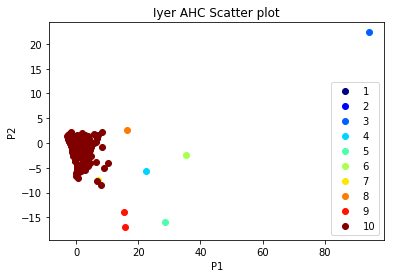

In [25]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer AHC Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

plt.show()
# fig = plt.figure()
# plt.savefig('pcaa.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

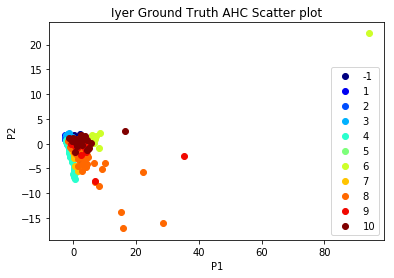

In [5]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Ground Truth AHC Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer Ground Truth AHC Scatter plot.png')